In [1]:
## written by Stefano Paesani

In [2]:
from itertools import combinations, combinations_with_replacement, product, count, filterfalse

from more_itertools import locate
import numpy as np

# Define some useful functions

In [3]:
def all_sums(all_elems, n):
    # generates all partitions of elems in sets with k elements, removing duplicates due to reordering
    all_combs = combinations_with_replacement(all_elems, n)
    all_combs = map(lambda x: tuple(sorted(x)), all_combs)
    all_combs = list(set(all_combs))
    return list(map(sum, all_combs)), all_combs

def equal_k_partitions(elems, k):
    # generates all partitions of elems in subsets with k elements, removing duplicates due to reordering
    l_el = len(elems)
    if l_el%k != 0:
        raise ValueError('Length of elems needs to be a multiple of k')
        
    if l_el>0:
        temp_list = []
        min_elem = min(elems)
        min_elem_ix = np.argmin(elems)
        elems_not_min = np.delete(elems, min_elem_ix)
        
        for this_temp_chunk in combinations(elems_not_min, k-1):
            this_chunk = tuple(np.append(min_elem, this_temp_chunk))
#             print('chunk:',this_chunk)
            for this_part in equal_k_partitions(np.setdiff1d(elems_not_min, this_temp_chunk), k):
#                 print('part:', this_part)
                temp_list.append([this_chunk]+ this_part)
        return temp_list
            
    else:
        return [[]]

# GHZ near-optimal solution  algorithm

In [4]:
"""
Algorithm that searches for a solution to the high-d GHZ generation scheme with N photons and dimension dim.
"""

N=3    # number of photons
dim=4  # dimensionality 




#####################################################################################################
### STEP 1: 
### Find set of (N-1)*dim positive integers such that all subsets of N-1 elements have different sums
#####################################################################################################

# this code is optimal in the sense that max(of the set) is minimal.

n=N-1
start_list = list(range(1, n+1))

#initialise mode_list and part_sums
modes_list = start_list
part_sums = [list(set(all_sums(modes_list, i)[0])) for i in range(n+1)]

for step in range((N-1)*dim - n):
    #pick new element in list
    n_subsets_sum = part_sums[n]
    n1_subsets_sum = part_sums[n-1]

    differences = map(lambda x: x[0] - x[1], product(n_subsets_sum, n1_subsets_sum))
    #finds the minimum positive integer not in differences
    abar = next(filterfalse(set(differences).__contains__, count(1)))

    # update part_sums with new element abar, and add abar to the list
    for i in range(1, n+1):
        part_sums[i] = list(set(part_sums[i] + [this_sum + abar for this_sum in part_sums[i-1]]))

    modes_list.append(abar)
    
    print(modes_list)

    
#####################################################################################################
### STEP 2: 
### Search for the smaller m to complement the obtained set with dim modes,
### finally obtained a valid list of N*dim modes and test if it provides a correct solution.
#####################################################################################################    
    
#### search is performed by scanning over a range of values for m, starting from smaller ms first.

all_parts = equal_k_partitions(modes_list, N-1)
all_parts_sums = [list(map(sum, part)) for part in all_parts]

min_m = max(modes_list)+1
max_m =min_m+4000

for m in range(min_m, max_m+1):
    all_modes_tests = [modes_list + [m - this_sum for this_sum in this_part_sums] for this_part_sums in all_parts_sums]

    valid_modes_tests = []
    for sum_list in all_parts_sums:
        new_test_elems = [m - this_sum for this_sum in sum_list]
    #     print('new elems:',new_test_elems, 'init elems: ', modes_list)
    #     print('    tests:', min(new_test_elems)>0, not (set(modes_list) & set(new_test_elems)))
        if min(new_test_elems)>0 and not (set(modes_list) & set(new_test_elems)):
            valid_modes_tests.append(modes_list+new_test_elems)


    ##### check whether the scheme works
    test_check = False
    for all_elems in valid_modes_tests:
        if not test_check:
            all_sums_found, all_combs_found = all_sums(all_elems, N)

            allowed_combs = [all_combs_found[i] for i in list(locate(all_sums_found, lambda a: a == m))]
            if len(allowed_combs)==dim:
                print('CORRECT GHZ! Obtained ',len(allowed_combs),'states:')
                print('beta_chi',allowed_combs)
                all_elems.sort()
                print('chi:',all_elems)
                test_check = True
    if not test_check:
        print('Done m=',m,' fail: no valid config found for GHZ scheme')
    else: 
        print('SUCCEDED WITH m=',m)
        break

[1, 2, 4]
[1, 2, 4, 8]
[1, 2, 4, 8, 13]
[1, 2, 4, 8, 13, 21]
[1, 2, 4, 8, 13, 21, 31]
[1, 2, 4, 8, 13, 21, 31, 45]
Done m= 46  fail: no valid config found for GHZ scheme
Done m= 47  fail: no valid config found for GHZ scheme
Done m= 48  fail: no valid config found for GHZ scheme
Done m= 49  fail: no valid config found for GHZ scheme
Done m= 50  fail: no valid config found for GHZ scheme
Done m= 51  fail: no valid config found for GHZ scheme
Done m= 52  fail: no valid config found for GHZ scheme
Done m= 53  fail: no valid config found for GHZ scheme
Done m= 54  fail: no valid config found for GHZ scheme
Done m= 55  fail: no valid config found for GHZ scheme
Done m= 56  fail: no valid config found for GHZ scheme
Done m= 57  fail: no valid config found for GHZ scheme
CORRECT GHZ! Obtained  4 states:
beta_chi [(1, 2, 55), (5, 8, 45), (4, 13, 41), (6, 21, 31)]
chi: [1, 2, 4, 5, 6, 8, 13, 21, 31, 41, 45, 55]
SUCCEDED WITH m= 58


# Some solutions found

In [5]:
"""
#####################################################
##################    N=3    ######################## 
#####################################################

(N, d) = (3, 2)
m = 15
chi = [1, 2, 3, 4, 8, 12]
beta_chi = [(1, 2, 12), (3, 4, 8)]

(N, d) = (3, 3)
m = 32
chi = [1, 2, 4, 7, 8, 11, 13, 21, 29]
beta_chi = [(8, 11, 13), (4, 7, 21), (1, 2, 29)]

(N, d) = (3, 4)
m = 58
chi = [1, 2, 4, 5, 6, 8, 13, 21, 31, 41, 45, 55]
beta_chi = [(1, 2, 55), (5, 8, 45), (4, 13, 41), (6, 21, 31)]

(N, d) = (3, 5)
m = 109
chi = [1, 2, 4, 7, 8, 13, 21, 30, 31, 33, 45, 66, 81, 97, 106]
beta_chi = [(4, 8, 97), (31, 33, 45), (1, 2, 106), (7, 21, 81), (13, 30, 66)]

(N, d) = (3, 6)
m = 154
chi = [1, 2, 4, 7, 8, 13, 18, 21, 26, 31, 45, 66, 81, 88, 97, 123, 142, 151]
beta_chi = [(7, 66, 81), (4, 8, 142), (26, 31, 97), (21, 45, 88), (1, 2, 151), (13, 18, 123)]

(N, d) = (3, 7)
m = 219
chi = [1, 2, 4, 5, 8, 13, 15, 16, 21, 31, 45, 66, 77, 81, 97, 123, 148, 175, 182, 207, 216]
beta_chi = [(5, 66, 148), (13, 31, 175), (45, 77, 97), (4, 8, 207), (16, 21, 182), (1, 2, 216), (15, 81, 123)]


(N, d) = (3, 8)
m = 263
chi = [1, 2, 3, 4, 8, 13, 21, 28, 31, 34, 36, 43, 45, 66, 81, 97, 123, 148, 176, 182, 204, 246, 252, 260]
beta_chi = [(34, 81, 148), (43, 97, 123), (21, 66, 176), (3, 8, 252), (28, 31, 204), (1, 2, 260), (4, 13, 246), (36, 45, 182)]


#####################################################
##################    N=4    ######################## 
#####################################################

(N, d) = (4, 2)
m = 69
chi = [1, 2, 3, 4, 8, 23, 43, 54]
beta_chi = [(1, 2, 23, 43), (3, 4, 8, 54)]

(N, d) = (4, 3)
m = 292
chi = [1, 2, 3, 4, 8, 23, 51, 54, 88, 164, 201, 277]
beta_chi = [(23, 51, 54, 164), (3, 4, 8, 277), (1, 2, 88, 201)]

(N, d) = (4, 4)
m = 1030
chi = [1, 2, 3, 4, 8, 23, 54, 88, 133, 164, 277, 279, 456, 609, 1004, 1015]
beta_chi = [(3, 4, 8, 1015), (133, 164, 277, 456), (54, 88, 279, 609), (1, 2, 23, 1004)]


#####################################################
##################    N=5    ######################## 
#####################################################

(N, d) = (5, 2)
m = 391
chi = [1, 2, 3, 4, 14, 20, 54, 138, 196, 350]
beta_chi = [(1, 2, 54, 138, 196), (3, 4, 14, 20, 350)]

(N, d) = (5, 3)
m = 5920
chi = [1, 2, 3, 4, 14, 20, 54, 138, 209, 350, 815, 1781, 2977, 5509, 5883]
beta_chi = [(1, 2, 14, 20, 5883), (3, 4, 54, 350, 5509), (138, 209, 815, 1781, 2977)]


"""

'\n#####################################################\n##################    N=3    ######################## \n#####################################################\n\n(N, d) = (3, 2)\nm = 15\nchi = [1, 2, 3, 4, 8, 12]\nbeta_chi = [(1, 2, 12), (3, 4, 8)]\n\n(N, d) = (3, 3)\nm = 32\nchi = [1, 2, 4, 7, 8, 11, 13, 21, 29]\nbeta_chi = [(8, 11, 13), (4, 7, 21), (1, 2, 29)]\n\n(N, d) = (3, 4)\nm = 58\nchi = [1, 2, 4, 5, 6, 8, 13, 21, 31, 41, 45, 55]\nbeta_chi = [(1, 2, 55), (5, 8, 45), (4, 13, 41), (6, 21, 31)]\n\n(N, d) = (3, 5)\nm = 109\nchi = [1, 2, 4, 7, 8, 13, 21, 30, 31, 33, 45, 66, 81, 97, 106]\nbeta_chi = [(4, 8, 97), (31, 33, 45), (1, 2, 106), (7, 21, 81), (13, 30, 66)]\n\n(N, d) = (3, 6)\nm = 154\nchi = [1, 2, 4, 7, 8, 13, 18, 21, 26, 31, 45, 66, 81, 88, 97, 123, 142, 151]\nbeta_chi = [(7, 66, 81), (4, 8, 142), (26, 31, 97), (21, 45, 88), (1, 2, 151), (13, 18, 123)]\n\n(N, d) = (3, 7)\nm = 219\nchi = [1, 2, 4, 5, 8, 13, 15, 16, 21, 31, 45, 66, 77, 81, 97, 123, 148, 175, 182, 207

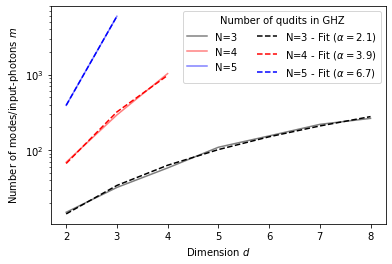

In [6]:
import matplotlib.pyplot as plt

# [[N, d, m], ...]
m_list = [[3, 2, 15], [3, 3, 32], [3, 4, 58], [3, 5, 109], [3, 6, 154], [3, 7, 219], [3, 8, 263],
          [4, 2, 69], [4, 3, 292], [4, 4, 1030], 
          [5, 2, 391], [5, 3, 5920],
         ]

m_list_N3 = np.array([this_res[1:] for this_res in m_list if this_res[0]==3])
m_list_N4 = np.array([this_res[1:] for this_res in m_list if this_res[0]==4])
m_list_N5 = np.array([this_res[1:] for this_res in m_list if this_res[0]==5])

def gen_m(N, d):
    return ((N**(N*d)) - 1)/((N**d) -1)

# fits 
fit_N3 = np.polyfit(np.log(m_list_N3.T[0]), np.log(m_list_N3.T[1]),1)
p_N3 = np.poly1d(fit_N3) 
fit_N4 = np.polyfit(np.log(m_list_N4.T[0]), np.log(m_list_N4.T[1]),1)
p_N4 = np.poly1d(fit_N4) 
fit_N5 = np.polyfit(np.log(m_list_N5.T[0]), np.log(m_list_N5.T[1]),1)
p_N5 = np.poly1d(fit_N5) 

plt.plot(m_list_N3.T[0],m_list_N3.T[1], 'k', alpha=0.5, label='N=3')
plt.plot(m_list_N4.T[0],m_list_N4.T[1], 'r', alpha=0.5, label='N=4')
plt.plot(m_list_N5.T[0],m_list_N5.T[1], 'b', alpha=0.5, label='N=5')
plt.plot(m_list_N3.T[0],np.exp(p_N3(np.log(m_list_N3.T[0]))), 'k--', label=r'N=3 - Fit ($\alpha =%.1f$)' % fit_N3[0])
plt.plot(m_list_N4.T[0],np.exp(p_N4(np.log(m_list_N4.T[0]))), 'r--', label=r'N=4 - Fit ($\alpha =%.1f$)' % fit_N4[0])
plt.plot(m_list_N5.T[0],np.exp(p_N5(np.log(m_list_N5.T[0]))), 'b--', label=r'N=5 - Fit ($\alpha =%.1f$)' % fit_N5[0])




# plt.plot(m_list_N3.T[0],[gen_m(3, i) for i in map(int,m_list_N3.T[0])], 'k:')
# plt.plot(m_list_N4.T[0],[gen_m(4, i) for i in map(int,m_list_N4.T[0])], 'r:')
# plt.plot(m_list_N5.T[0],[gen_m(5, i) for i in map(int,m_list_N5.T[0])], 'b:')


plt.yscale('log')
# plt.xscale('log')
plt.xlabel(r'Dimension $d$')
plt.ylabel(r'Number of modes/input-photons $m$')
plt.legend(title=r'Number of qudits in GHZ', ncol=2)
# plt.savefig('GHZ_NewAlgorithm.png', dpi=300)
plt.show()

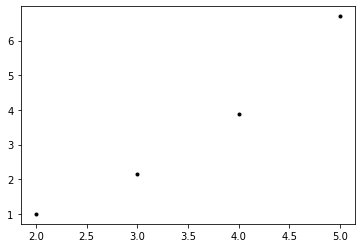

In [7]:
dim_list = [2, 3, 4 ,5]
GHZscheme_exponents = [1, fit_N3[0], fit_N4[0], fit_N5[0]]

plt.plot(dim_list, GHZscheme_exponents, 'k.')